# Quantitative Analysis of Price & Daily Returns
* Can returns be described with a normal distribution?
* Is daily change non-zero?
* Can price movement be described as a random walk?

### 1. Set up environment 

In [3]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr

### 2.  Download stock price data, store in dataframe

In [4]:
amzn = yf.download('AMZN')

[*********************100%***********************]  1 of 1 completed


### 3. Take a look at the data

In [5]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


### 4. Store instantaneous rate of return in separate series

In [6]:
amzn_return = round(np.log(amzn.Close).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
1997-05-16   -12.45
1997-05-19    -1.21
1997-05-20    -4.36
1997-05-21   -13.63
1997-05-22    -2.21
Name: Close, dtype: float64

### 5. Plot the series 

<AxesSubplot:xlabel='Date'>

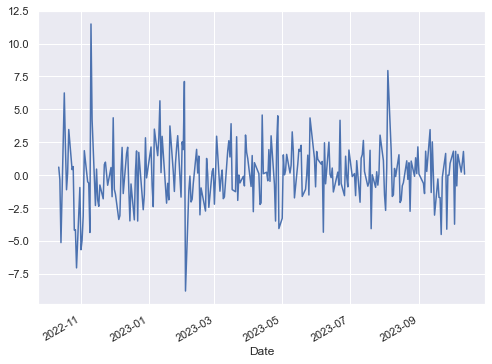

In [7]:
amzn_return[-252:].plot()

### 6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them 

In [8]:
amzn_return.describe()

count    6646.000000
mean        0.108459
std         3.536854
min       -28.460000
25%        -1.330000
50%         0.040000
75%         1.470000
max        29.620000
Name: Close, dtype: float64

### 7. An alternative more slightly  different table of descriptives from scipy stats

In [9]:
from scipy import stats

In [10]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5

### 9. for comparision generate random numbers that follow normal distribution


In [11]:
from scipy.stats import norm

In [12]:
x = norm.rvs(mean, std, n)

In [13]:
stats.describe(x)

DescribeResult(nobs=6646, minmax=(-12.829777605933815, 13.282295338311966), mean=0.11530400962793765, variance=12.540889637820671, skewness=-0.0030863410431066734, kurtosis=0.07133560797664007)

(array([   7.,   20.,   72.,  216.,  455.,  806., 1148., 1344., 1107.,
         779.,  431.,  176.,   64.,   12.,    9.]),
 array([-12.82977761, -11.08897274,  -9.34816788,  -7.60736302,
         -5.86655815,  -4.12575329,  -2.38494843,  -0.64414357,
          1.0966613 ,   2.83746616,   4.57827102,   6.31907589,
          8.05988075,   9.80068561,  11.54149048,  13.28229534]),
 <BarContainer object of 15 artists>)

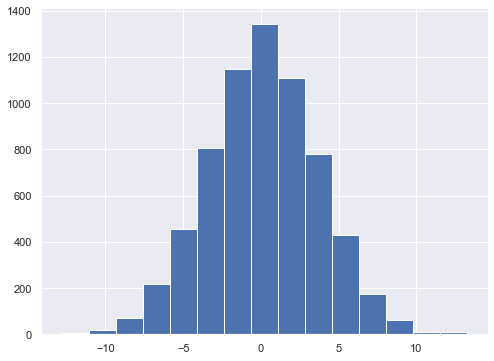

In [14]:
plt.hist(x, bins=15)

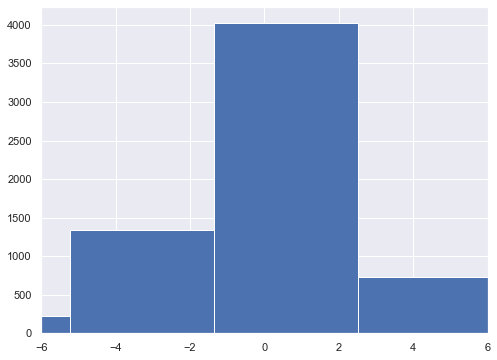

In [15]:
plt.hist(amzn_return, bins = 15)
plt.xlim(-6,6);

## Is price change normally distributed?

### 10. Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [21]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -1.29          0.1977
AMZN:         33.39          0.0000


### 11. plot histogram of price changes with normal curve overlay


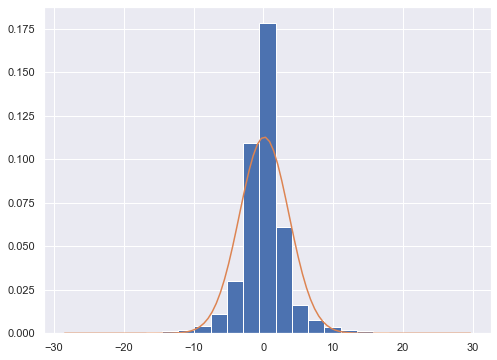

In [22]:
plt.hist(amzn_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

### 12. Compare normally distributed sample with same attributes as amzn price change

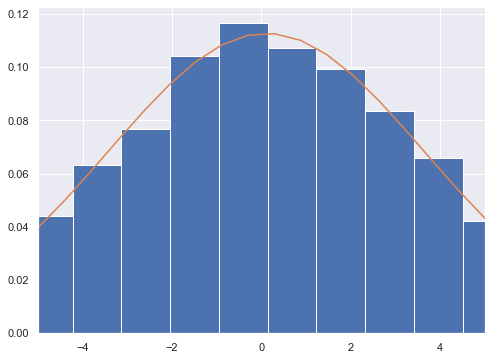

In [23]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

## Is daily price change significantly different from zero?

### 13. Conduct simple hypothesis test

In [24]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

Ttest_1sampResult(statistic=0.5916450594527083, pvalue=0.554620783117744)

## Can price movement be described as a random walk?

### 14. Create price lags

In [25]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
1997-05-19,0.085417,0.086458,0.097917
1997-05-20,0.081771,0.085417,0.086458
1997-05-21,0.071354,0.081771,0.085417
1997-05-22,0.069792,0.071354,0.081771
1997-05-23,0.075000,0.069792,0.071354


### 15. Fit linear model

In [26]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [27]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [28]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
1997-05-19,0.085417,0.086458,0.097917,0.086762
1997-05-20,0.081771,0.085417,0.086458,0.085454
1997-05-21,0.071354,0.081771,0.085417,0.081874
1997-05-22,0.069792,0.071354,0.081771,0.071629
1997-05-23,0.075000,0.069792,0.071354,0.069840


<AxesSubplot:xlabel='Date'>

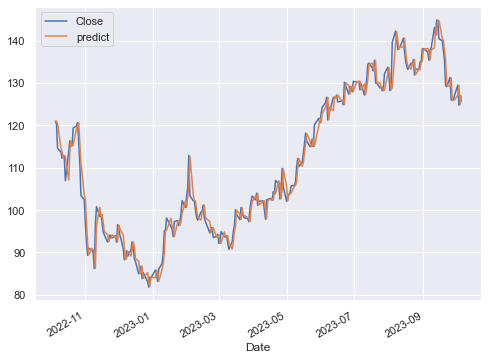

In [29]:
amzn_close.iloc[-252:][['Close', 'predict']].plot()